# The project: In-Sample Time Series Forecasting Using Prophet and XGBoost

This project focuses on modeling and evaluating daily electricity consumption per cluster using two different time series forecasting methods:

1. [Prophet](https://facebook.github.io/prophet/) – A decomposable time series model from Meta (formerly Facebook) designed for interpretability and seasonality modeling.
2. [XGBoost](https://xgboost.readthedocs.io/) – A powerful gradient boosting method, combined here with manually engineered lag and rolling features for autoregressive forecasting.

Each cluster contains multiple clients. The daily consumption data is aggregated per cluster (mean across clients) and then modeled to forecast in-sample values, which are compared to the actual historical data using two standard accuracy metrics:
- MAPE (Mean Absolute Percentage Error)
- RMSE (Root Mean Squared Error)

---

## 1. Prophet Model (In-Sample Forecast)

The following steps are performed for each cluster:

- Cluster-level daily consumption is computed by taking the mean over all clients.
- A `Prophet` model is trained on the entire historical data.
- An in-sample forecast is generated over the original time range.
- The predicted values (`yhat`) are compared to the true values (`y`) for the entire history.
- Zero or near-zero actual values are excluded from MAPE to avoid division errors.
- The model outputs are plotted alongside the real data for visual inspection.
- Accuracy is evaluated using MAPE and RMSE.

---

## 2. XGBoost Model (In-Sample Forecast)

For the same clusters, an XGBoost-based pipeline is constructed:

- The time series is normalized using `MinMaxScaler`.
- Lag features (`t-1`, `t-2`, `t-3`, `t-7`) and rolling statistics (mean, std) are generated manually.
- An `XGBRegressor` is trained to predict the current value from the lagged inputs.
- The model performs in-sample prediction across the full training range.
- Predictions are inverse-transformed back to the original scale.
- Accuracy is again evaluated using MAPE (excluding `y_true == 0`) and RMSE.
- Visual plots show actual vs. predicted series per cluster.

---

## 3. Evaluation Results

Below is a direct comparison of the in-sample forecast performance for each cluster:

| Cluster | Model    | MAPE (%) | RMSE      |
|---------|----------|----------|-----------|
| 0       | Prophet  | 14.73%   | 1,881     |
| 0       | XGBoost  | 1.04%    | 345       |
| 1       | Prophet  | 19.20%   | 530,494   |
| 1       | XGBoost  | 2.66%    | 128,441   |
| 2       | Prophet  | 14.87%   | 100,060   |
| 2       | XGBoost  | 1.64%    | 27,486    |
| 3       | Prophet  | 47.94%   | 209,706   |
| 3       | XGBoost  | 4.50%    | 42,528    |

---

## 4. Summary and Insights

- **XGBoost significantly outperforms Prophet** across all clusters, achieving lower error metrics both in terms of MAPE and RMSE.
- The improvement is particularly pronounced in clusters with complex or non-seasonal patterns where Prophet tends to underperform.
- Prophet is easier to use (automatic trend/seasonality detection), but XGBoost provides superior accuracy when engineered features are applied.
- XGBoost’s performance highlights the value of incorporating custom lag features and direct modeling of temporal dependencies.



# The dataset: ElectricityLoadDiagrams20112014 Dataset Explanation

## Overview

The file `LD2011_2014.txt` is the core file of the **ElectricityLoadDiagrams20112014** dataset. It contains detailed electricity consumption measurements for hundreds of clients, recorded at regular 15-minute intervals, spanning from **January 1, 2011** to **December 31, 2014**.

This dataset is suitable for a wide range of **time series analysis** and **signal processing** tasks, including but not limited to:

* Anomaly detection
* Seasonality decomposition
* Forecasting (short-term and long-term)
* Customer segmentation
* Load clustering
* Energy demand profiling

## Structure

* **Rows**: Each row represents a single **timestamped reading**, recorded every **15 minutes**.
* **Columns**: Each column corresponds to a **unique client/metre ID** (e.g., `MT_001`, `MT_002`, ...).
* **Values**: Consumption values in **kilowatts (kW)**.

Example of the raw format:

| Timestamp           | MT_001 | MT_002 | MT_003 | ... |
| ------------------- | ------ | ------ | ------ | --- |
| 2011-01-01 00:15:00 | 1.118  | 1.055  | 1.175  | ... |
| 2011-01-01 00:30:00 | 1.102  | 1.067  | 1.156  | ... |
| ...                 | ...    | ...    | ...    | ... |


## Time Range

* **Start**: 2011-01-01 00:15:00
* **End**: 2014-12-31 23:45:00
* **Frequency**: Every 15 minutes
* **Total Duration**: 4 full years

## Data Characteristics

* More than **370 clients/meters**
* Some columns contain **missing values**, which should be filled using techniques like forward-fill or interpolation
* Data can be **resampled** to hourly, daily, or weekly levels depending on the use case
* Seasonal trends are clearly visible (e.g., daily/weekly cycles)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
import os

# Path to the ZIP file in your Google Drive
zip_path = "/content/drive/MyDrive/Portfolio datasets/Signal processing/electricityloaddiagrams20112014.zip"

# Destination folder to extract to
extract_path = "/content/electricityLoadDiagrams20112014"
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extracted to: {extract_path}")


Extracted to: /content/electricityLoadDiagrams20112014


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------
# Step 1: Load the file
# ----------------------------------------

file_path = "/content/electricityLoadDiagrams20112014/LD2011_2014.txt"

df = pd.read_csv(
    file_path,
    sep=";",
    index_col=0,
    parse_dates=True,
    decimal=","
)
df.index.name = "timestamp"
df.columns = [col.strip() for col in df.columns]

print("Raw shape:", df.shape)
print("df:", df.head())

Raw shape: (140256, 370)
df:                      MT_001  MT_002  MT_003  MT_004  MT_005  MT_006  MT_007  \
timestamp                                                                     
2011-01-01 00:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                     MT_008  MT_009  MT_010  ...  MT_361  MT_362  MT_363  \
timestamp                                    ...                           
2011-01-01 00:15:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0  ...     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0  

In [6]:
# Step 2: Create daily_profiles → reshape to clients × days

# Resample by day and sum kWh per day (assumes original freq = 15min)
daily_df = df.resample("D").sum()

# Transpose: now rows are clients, columns are days
daily_profiles = daily_df.T

print("Daily profiles shape (clients × days):", daily_profiles.shape)
daily_profiles.head()


from sklearn.cluster import KMeans

# Step 3: Cluster clients based on their daily profiles

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(daily_profiles)

# Create client_cluster_df
client_cluster_df = pd.DataFrame({
    "ClientID": daily_profiles.index,
    "Cluster": labels
})

# Group by cluster
cluster_groups = client_cluster_df.groupby("Cluster")["ClientID"].apply(list)




Daily profiles shape (clients × days): (370, 1462)


In [7]:
# Step 4: Filter only clients that are clustered
client_ids = client_cluster_df["ClientID"]
daily_profiles_filtered = daily_profiles.loc[client_ids]

# Step 5: Create artificial date range
start_date = pd.to_datetime("2011-01-01")
date_range = pd.date_range(start=start_date, periods=daily_profiles_filtered.shape[1], freq="D")


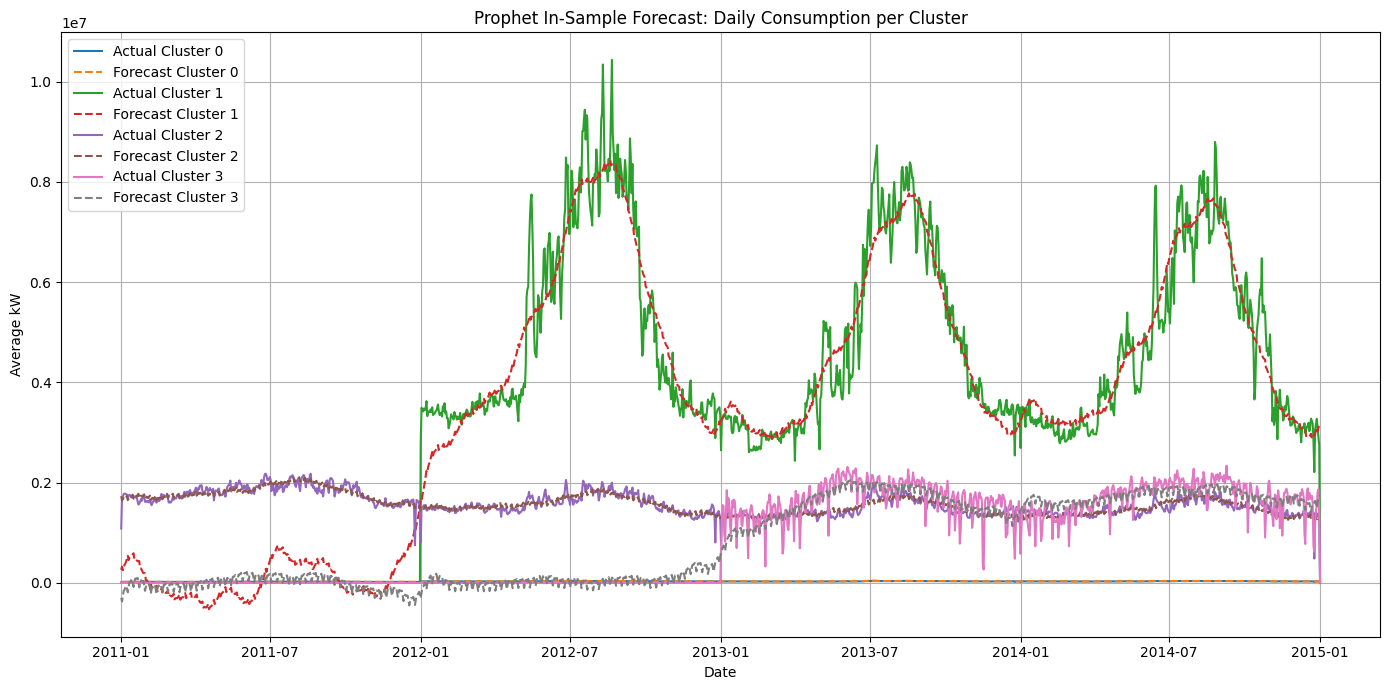


In-Sample Forecast Accuracy (Filtered MAPE):
Cluster 0:  MAPE = 14.73%   RMSE = 1,881
Cluster 1:  MAPE = 19.20%   RMSE = 530,494
Cluster 2:  MAPE = 14.87%   RMSE = 100,060
Cluster 3:  MAPE = 47.94%   RMSE = 209,706


In [18]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import logging
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

warnings.filterwarnings("ignore")
logging.getLogger("cmdstanpy").setLevel(logging.CRITICAL)

plt.figure(figsize=(14, 7))

metrics = []

for cluster_id, client_ids in cluster_groups.items():
    # Prepare cluster data
    cluster_data = daily_profiles_filtered.loc[client_ids]
    cluster_mean = cluster_data.mean(axis=0).values

    df_prophet = pd.DataFrame({
        "ds": date_range,
        "y": cluster_mean
    })

    # Fit Prophet model
    model = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=True)
    model.fit(df_prophet)

    # Predict on historical range (in-sample)
    future = df_prophet[["ds"]]
    forecast = model.predict(future)

    # Merge predictions with actuals
    df_merged = pd.merge(df_prophet, forecast[["ds", "yhat"]], on="ds", how="inner")
    y_true = df_merged["y"].values
    y_pred = df_merged["yhat"].values

    # Filter out zero/near-zero y_true to avoid division by zero in MAPE
    valid_mask = y_true > 0
    y_true_valid = y_true[valid_mask]
    y_pred_valid = y_pred[valid_mask]

    # Compute metrics
    mape = mean_absolute_percentage_error(y_true_valid, y_pred_valid)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    metrics.append((cluster_id, mape, rmse))

    # Plot
    plt.plot(df_merged["ds"], y_true, label=f"Actual Cluster {cluster_id}")
    plt.plot(df_merged["ds"], y_pred, linestyle="--", label=f"Forecast Cluster {cluster_id}")

# Finalize plot
plt.title("Prophet In-Sample Forecast: Daily Consumption per Cluster")
plt.xlabel("Date")
plt.ylabel("Average kW")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print metrics
print("\nIn-Sample Forecast Accuracy (Filtered MAPE):")
for cluster_id, mape, rmse in metrics:
    print(f"Cluster {cluster_id}:  MAPE = {mape:.2%}   RMSE = {rmse:,.0f}")


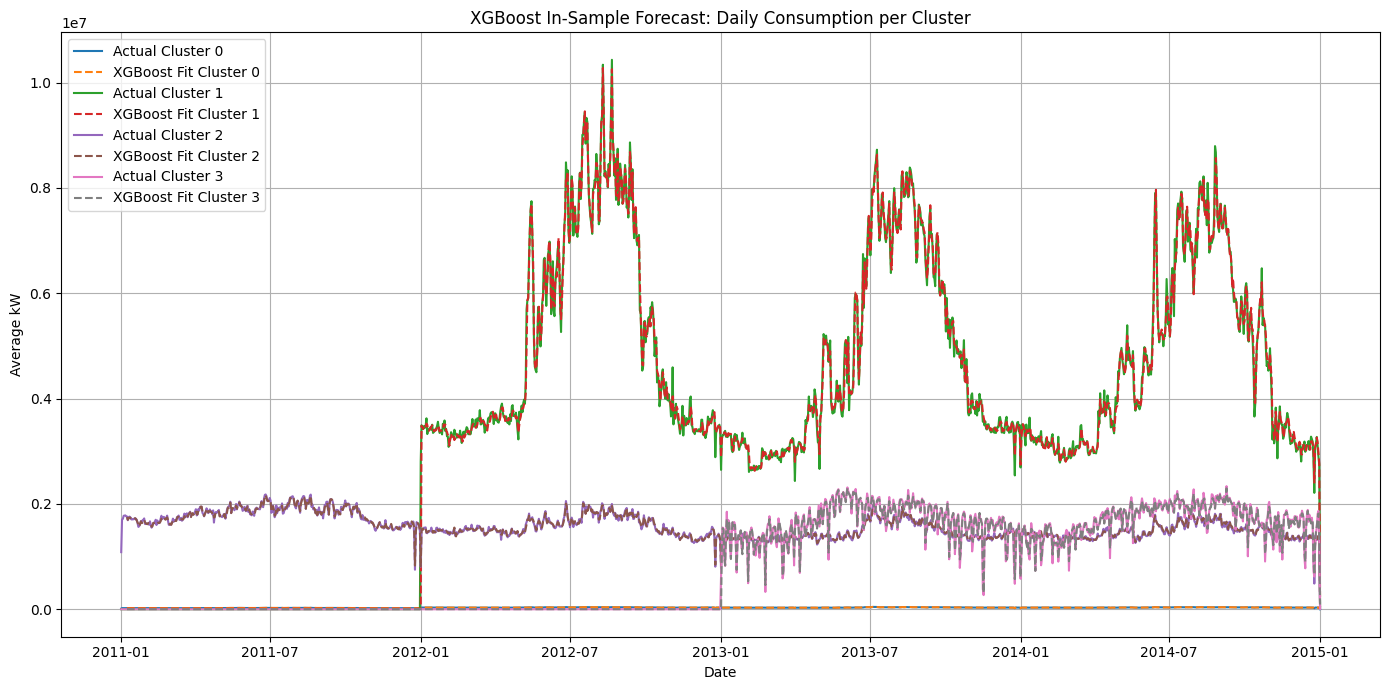


XGBoost In-Sample Forecast Accuracy (Filtered MAPE):
Cluster 0:  MAPE = 1.04%   RMSE = 345
Cluster 1:  MAPE = 2.66%   RMSE = 128,441
Cluster 2:  MAPE = 1.64%   RMSE = 27,486
Cluster 3:  MAPE = 4.50%   RMSE = 42,528


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(14, 7))

metrics = []

# Lag feature generator
def create_lag_features(series, lags=[1,2,3,7], rolling_windows=[3,7]):
    df = pd.DataFrame({"y": series})
    for lag in lags:
        df[f"lag_{lag}"] = df["y"].shift(lag)
    for window in rolling_windows:
        df[f"roll_mean_{window}"] = df["y"].shift(1).rolling(window).mean()
        df[f"roll_std_{window}"] = df["y"].shift(1).rolling(window).std()
    df.dropna(inplace=True)
    return df

# Loop through clusters
for cluster_id, client_ids in cluster_groups.items():
    cluster_data = daily_profiles_filtered.loc[client_ids]
    cluster_mean = cluster_data.mean(axis=0).values
    date_index = pd.to_datetime(date_range)

    # Normalize
    scaler = MinMaxScaler()
    scaled_series = scaler.fit_transform(cluster_mean.reshape(-1, 1)).flatten()

    # Build lag features
    df_lagged = create_lag_features(scaled_series)
    X = df_lagged.drop(columns=["y"])
    y = df_lagged["y"]
    pred_dates = date_index[-len(y):]

    # Train model and predict
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X, y)
    y_pred_scaled = model.predict(X)

    # Inverse transform to original scale
    y_true = scaler.inverse_transform(y.values.reshape(-1, 1)).flatten()
    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Safe MAPE (exclude y_true == 0)
    valid_mask = y_true > 0
    y_true_valid = y_true[valid_mask]
    y_pred_valid = y_pred[valid_mask]

    mape = mean_absolute_percentage_error(y_true_valid, y_pred_valid)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    metrics.append((cluster_id, mape, rmse))

    # Plot actual and prediction
    plt.plot(date_index, scaler.inverse_transform(scaled_series.reshape(-1, 1)).flatten(), label=f"Actual Cluster {cluster_id}")
    plt.plot(pred_dates, y_pred, linestyle="--", label=f"XGBoost Fit Cluster {cluster_id}")

# Plot settings
plt.title("XGBoost In-Sample Forecast: Daily Consumption per Cluster")
plt.xlabel("Date")
plt.ylabel("Average kW")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print metrics
print("\nXGBoost In-Sample Forecast Accuracy (Filtered MAPE):")
for cluster_id, mape, rmse in metrics:
    print(f"Cluster {cluster_id}:  MAPE = {mape:.2%}   RMSE = {rmse:,.0f}")
